In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from fredapi import Fred
import yfinance as yfin
import datetime
import seaborn as sns
import math

a. Find the 30 largest holdings.

In [2]:
file_path = r"C:\Users\kaleu\Desktop\WQU\GWP_Q4\holdings-daily-us-en-spy.xlsx"
# Data Source : https://www.ssga.com/us/en/intermediary/etfs/spdr-sp-500-etf-trust-spy

df = pd.read_excel(file_path, header=4)
df_first_30 = df.iloc[:30].dropna(axis =1)

df_first_30

#Get the ticker for the 30 largest holdings
df_first_30_Ticker = df_first_30['Ticker']
df_first_30_Ticker = df_first_30_Ticker.replace('BRK.B', 'BRK-B')
ticker_list = df_first_30_Ticker.tolist()

print(f"30 largest holdings constitute {round(sum(df_first_30['Weight']), 2)}% of total holdings")

df_first_30

30 largest holdings constitute 54.19% of total holdings


,Name,Ticker,Identifier,SEDOL,Weight,Sector,Shares Held,Local Currency
0,NVIDIA CORP,NVDA,67066G104,2379504,7.627115,-,287392967.0,USD
1,MICROSOFT CORP,MSFT,594918104,2588173,6.697946,-,87550625.0,USD
2,APPLE INC,AAPL,037833100,2046251,6.613772,-,174795499.0,USD
3,AMAZON.COM INC,AMZN,023135106,2000019,3.774869,-,114308964.0,USD
4,META PLATFORMS INC CLASS A,META,30303M102,B7TL820,2.914091,-,25546301.0,USD
5,BROADCOM INC,AVGO,11135F101,BDZ78H9,2.818876,-,55398100.0,USD
6,ALPHABET INC CL A,GOOGL,02079K305,BYVY8G0,2.539233,-,68513328.0,USD
7,TESLA INC,TSLA,88160R101,B616C79,2.194632,-,33050603.0,USD
8,ALPHABET INC CL C,GOOG,02079K107,BYY88Y7,2.044131,-,55000957.0,USD
9,BERKSHIRE HATHAWAY INC CL B,BRK.B,084670702,2073390,1.609991,-,21597517.0,USD


b. Get at least 6 months of data (~ 120 data points).

In [3]:
#Reference :M2L2 

# Starting and end dates
start = datetime.date(2025, 3, 20)
end = datetime.date(2025, 9, 23)

# Get data
df = yfin.download(ticker_list, start, end, auto_adjust = False)['Adj Close']

# Display the first five rows
df.head()

[*********************100%***********************]  30 of 30 completed


Ticker,AAPL,ABBV,AMZN,AVGO,BAC,BRK-B,COST,CSCO,CVX,GE,...,NVDA,ORCL,PG,PLTR,TSLA,UNH,V,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-20,213.577225,208.220703,194.949997,189.767441,41.997536,528.729980,892.997742,59.857998,160.994995,203.632614,...,118.515083,151.850693,165.381104,87.389999,236.259995,504.513031,338.341766,71.703072,85.169670,113.783485
2025-03-21,217.737045,206.305084,196.210007,190.882904,41.987648,521.909973,906.820557,59.542027,160.975449,203.832336,...,117.685188,151.363480,164.532227,90.959999,248.710007,509.989319,334.514893,71.703072,85.572754,113.390785
2025-03-24,220.191025,205.479919,203.259995,190.474564,42.580833,525.849976,923.555481,60.203606,161.239273,209.923431,...,121.394730,153.988449,163.505692,96.750000,278.390015,509.644012,342.696838,73.443253,87.075600,113.685310
2025-03-25,223.203659,197.788040,205.710007,187.496674,42.788445,528.869995,927.764221,60.223351,162.138184,211.820663,...,120.674820,153.053787,160.741943,96.500000,288.140015,506.614777,343.444305,73.403702,84.358536,114.460876
2025-03-26,220.989075,197.748749,201.130005,178.543137,42.333672,533.210022,927.255554,61.023170,164.121674,207.067596,...,113.745689,146.958694,164.423645,92.279999,272.059998,511.321442,343.005798,72.642380,84.806404,116.110199


c. Compute the daily returns.

In [4]:
daily_returns = df.pct_change().dropna()
daily_returns

Ticker,AAPL,ABBV,AMZN,AVGO,BAC,BRK-B,COST,CSCO,CVX,GE,...,NVDA,ORCL,PG,PLTR,TSLA,UNH,V,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-21,0.019477,-0.009200,0.006463,0.005878,-0.000235,-0.012899,0.015479,-0.005279,-0.000121,0.000981,...,-0.007002,-0.003209,-0.005133,0.040851,0.052696,0.010855,-0.011311,0.000000,0.004733,-0.003451
2025-03-24,0.011270,-0.004000,0.035931,-0.002139,0.014128,0.007549,0.018455,0.011111,0.001639,0.029883,...,0.031521,0.017342,-0.006239,0.063654,0.119336,-0.000677,0.024459,0.024269,0.017562,0.002597
2025-03-25,0.013682,-0.037434,0.012054,-0.015634,0.004876,0.005743,0.004557,0.000328,0.005575,0.009038,...,-0.005930,-0.006070,-0.016903,-0.002584,0.035023,-0.005944,0.002181,-0.000539,-0.031204,0.006822
2025-03-26,-0.009922,-0.000199,-0.022264,-0.047753,-0.010628,0.008206,-0.000548,0.013281,0.012233,-0.022439,...,-0.057420,-0.039823,0.022904,-0.043731,-0.055806,0.009290,-0.001277,-0.010372,0.005309,0.014409
2025-03-27,0.010473,0.007054,0.001144,-0.040609,-0.006072,0.002457,0.009680,-0.006473,-0.007859,-0.007185,...,-0.020482,-0.013667,0.012787,-0.023732,0.003933,-0.004786,0.016503,-0.016197,0.004929,-0.003213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-16,0.006126,-0.006204,0.011321,-0.011233,0.001384,-0.001119,-0.008364,-0.001343,0.014176,0.021584,...,-0.016146,0.014927,0.007779,-0.005549,0.028241,-0.023312,0.002890,-0.000246,-0.002604,0.020739
2025-09-17,0.003527,0.021040,-0.010382,-0.038417,0.014607,0.002729,0.011512,0.011803,0.003447,-0.011844,...,-0.026247,-0.017088,0.014426,-0.011336,0.010056,0.005386,0.018145,0.013392,0.008219,0.005319
2025-09-18,-0.004645,0.005344,-0.001684,-0.002369,0.014202,-0.003717,-0.011080,0.014176,-0.007808,0.026218,...,0.034940,-0.015892,-0.018774,0.051328,-0.021157,-0.019876,-0.023166,0.012367,-0.006426,-0.011796


d. Compute the covariance matrix.

In [5]:
daily_returns_cov = daily_returns.cov()

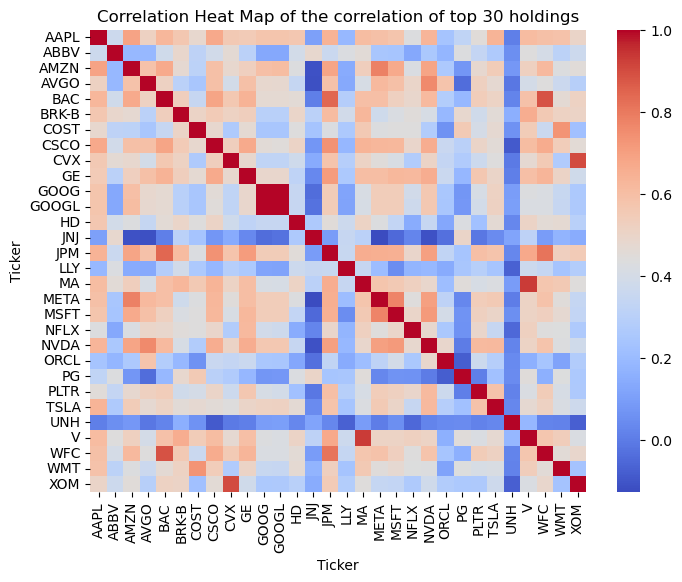

In [6]:
#Further analysis on the heatmap for correlation matrix
daily_returns_corr = daily_returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(daily_returns_corr, annot=False, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heat Map of the correlation of top 30 holdings')
plt.show()

e. Compute the PCA.

In [21]:
# 
#Standardize the matrix

daily_returns_means = daily_returns.mean()
daily_returns_stds = daily_returns.std()


standardized_data = (daily_returns - daily_returns_means) / daily_returns_stds
std_data_cov = standardized_data.cov()

eigenvalues, eigenvectors = LA.eig(std_data_cov)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Put data into a DataFrame
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,31))

# Work out explained proportion
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
df_eigval["Cumulative explained proportion"] = df_eigval["Explained proportion"].cumsum()

#Format as percentage
df_eigval.style.format({
    "Explained proportion": "{:.2%}",
    "Cumulative explained proportion": "{:.2%}"
})

eigenvectors_PCA= eigenvectors

Produce a screeplot of the variance explained for each component.

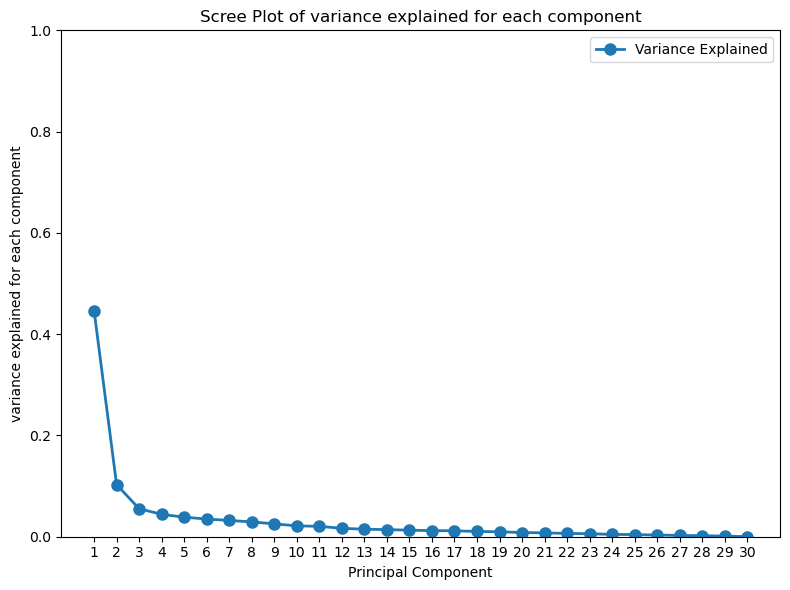

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(df_eigval.index, df_eigval["Explained proportion"], 'o-', markersize=8, linewidth=2, label='Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('variance explained for each component')
plt.title('Scree Plot of variance explained for each component')
plt.xticks(df_eigval.index)
plt.legend()
plt.tight_layout()
plt.ylim(0, 1)
# Display the plot
plt.show()

60% of total variance will be explained by first 3 PC, if we want to explain 80% of the variance we could select the top 9 PCs  
If we want more than 90% of explained variance , we can include top 15 PCs, after that the increment are extremely immaterial.

f. Compute the SVD.

In [23]:
#Reference : M3L4

standardized_returns_dvd_sqrt_n=(standardized_data/math.sqrt(len(standardized_data)-1))

# Use SVD to calculate eigenvectors and eigenvalues of the covariance matrix of standardized returns

U_st_return, s_st_return, VT_st_return = np.linalg.svd(standardized_returns_dvd_sqrt_n)

eigenvalues = s_st_return**2
eigenvectors_SVD = VT_st_return.T
print("\nSquared Singular values (eigenvalues):")
print(eigenvalues)
print("\nMatrix V (eigenvectors)")
print(eigenvectors_SVD)


Squared Singular values (eigenvalues):
[1.33989386e+01 3.08565023e+00 1.66192622e+00 1.32469240e+00
 1.15862915e+00 1.04619299e+00 9.64565595e-01 8.77596139e-01
 7.62890567e-01 6.43186394e-01 6.17294037e-01 4.95593960e-01
 4.46527042e-01 4.20020159e-01 3.87887631e-01 3.61518589e-01
 3.51681200e-01 3.10779110e-01 2.93247698e-01 2.48498899e-01
 2.27517771e-01 1.96470454e-01 1.74866621e-01 1.38236060e-01
 1.26245616e-01 1.00387577e-01 7.65258928e-02 5.98544088e-02
 4.07200898e-02 1.85893706e-03]

Matrix V (eigenvectors)
[[-2.21989504e-01  1.13124510e-02 -6.60280548e-02  1.65863364e-01
  -1.68020900e-01  7.90122914e-02 -1.31477893e-01  3.68440492e-02
  -4.58864222e-02 -5.06129701e-02 -2.29992021e-02  2.61165692e-01
  -2.78804521e-01 -1.09266403e-01 -1.52545897e-01  7.65709444e-02
   1.37649779e-01  2.08594461e-01  1.43251309e-01 -5.52239080e-01
  -1.00607764e-01 -1.48612312e-01  4.60468979e-01  5.77017823e-02
   1.31925202e-01 -1.20664271e-01 -7.48169261e-02  7.54972905e-03
   1.38807068e

In [68]:
# only Sign different
for i in range(len(eigenvectors_SVD)):
    print(set([round(num,4) for num in (eigenvectors_SVD/eigenvectors_PCA)[i]]))

{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64(-1.0)}
{np.float64(1.0), np.float64